## B. Simple Linear Regression (30 points)

(3, 1) (3,)


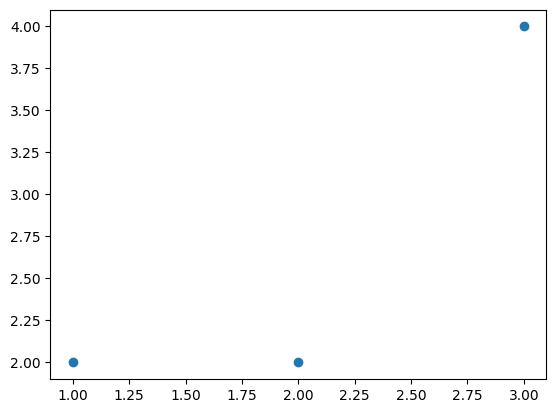

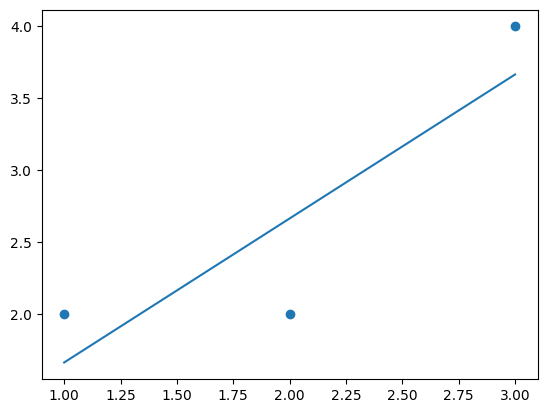

B_3-2
0.666666666666667 [1.]
[0.66666667 1.        ]


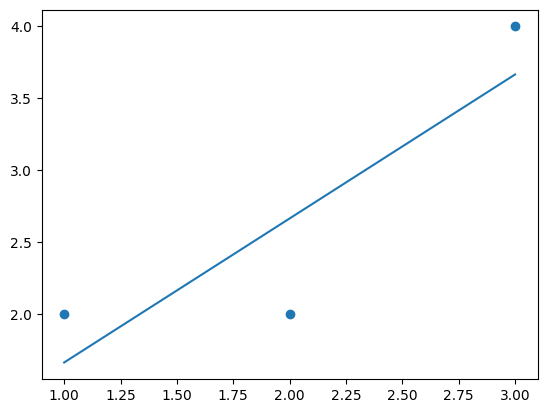

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# B1-1
x_train = np.array([[1], [2], [3]])
y_train = np.array([2, 2, 4])
# B1-2
print(x_train.shape, y_train.shape)
# B1-3
plt.scatter(x_train, y_train)
plt.show()

# B_2-1


def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    xavg = np.average(x_train)
    yavg = np.average(y_train)
    sigmax = x_train - xavg
    sigmay = y_train - yavg

    beta_1 = np.sum(np.transpose(sigmax) * sigmay)/np.sum(np.power(sigmax, 2))
    beta_0 = yavg - (beta_1 * xavg)

    return np.array([beta_0, beta_1])


def main():
    # B_2-2
    beta = simple_linear_regression_fit(x_train, y_train)

    # B_2-3
    y = beta[0] + x_train * beta[1]
    plt.plot(x_train, y)
    plt.scatter(x_train, y_train)
    plt.show()

    # B_3-1
    lim = LinearRegression()
    lim.fit(x_train, y_train)

    # B_3-2
    print('B_3-2')
    print(lm.intercept_, lm.coef_)
    print(beta)

    # B_3-3
    y_lm = lm.intercept_ + x_train * lm.coef_
    plt.plot(x_train, y_lm)
    plt.scatter(x_train, y_train)
    plt.show()


if __name__ == "__main__":
    main()


## C. Multiple and Polynomial Regression (35 points)

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('epldata_final.csv')
df['age^2'] = df['age']**2
df['log2_page_views'] = np.log2(df['page_views'])

x_train = df[['fpl_points', 'age', 'age^2', 'log2_page_views',
              'new_signing', 'big_club', 'position_cat']]
y_train = df[['market_value']]

x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(
    x_train, y_train, random_state=42, train_size=0.8)

lm = LinearRegression()
lm.fit(x_train_data, y_train_data)
y_pred = lm.predict(x_test_data)
y_pred_train = lm.predict(x_train_data)
print(lm.intercept_, lm.coef_)
print('Mean Squared Error:', metrics.mean_squared_error(y_test_data, y_pred))
print('Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_test_data, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_data, y_pred))

print('train_Mean Squared Error:',
      metrics.mean_squared_error(y_train_data, y_pred_train))
print('train_Root Mean Squared Error:', np.sqrt(
    metrics.mean_squared_error(y_train_data, y_pred_train)))
print('train_Mean Absolute Error:',
      metrics.mean_absolute_error(y_train_data, y_pred_train))


[-89.29326795] [[ 0.08490293  6.41193931 -0.12676364  1.80484116  0.47095408  9.45420428
  -0.98595415]]
Mean Squared Error: 34.55762061734558
Root Mean Squared Error: 5.87857300859193
Mean Absolute Error: 4.2926631114712075
train_Mean Squared Error: 51.55351577419317
train_Root Mean Squared Error: 7.180077699732307
train_Mean Absolute Error: 5.084610601652128
